<a href="https://colab.research.google.com/github/RaihanHeggi/Random-Coding-With-Python/blob/master/Caesar_Cipher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ENKRIPSI CAESAR INTRO 1**


In [1]:
# Graded
def caesar_encript(txt,shift):
  new_string = ""
  txt_index = 0 
  new_index = 0
  for x in txt:
    #cek apakah huruf kapital karena nilai unicodenya beda antara a dengan A
    if x.isupper() :
      txt_index = ord(x) - ord("A")
      new_index = (txt_index + shift) % 26
      new_string += chr(new_index + ord("A")) 
    #cek apakah huruf non kapital atau lower sehingga perhitungan indexnya ord("a")
    elif x.islower() :
      txt_index = ord(x) - ord("a")
      new_index = (txt_index + shift) % 26
      new_string += chr(new_index + ord("a")) 
    #jika buka tidak masuk kategori dalam hal ini spasi dan tanda baca 
    else: 
      new_string += x
  return new_string
    
# Fungsi Decript caesar
def caesar_decript(chiper,shift):
  return caesar_encript(chiper,-shift)

In [2]:
# Sanity check!!!

msg = 'Halo Heggi!'
cpr = caesar_encript(msg,4)
txt = caesar_decript(cpr,4)

print('plain text:',txt)
print('chiper text:',cpr)

plain text: Halo Heggi!
chiper text: Leps Likkm!


## **ENKRIPSI CAESAR INTRO 2**

In [3]:
# Graded
 
# Fungsi mengacak urutan
def shuffle_order(txt,order):
  return ''.join([txt[i] for i in order])
 
# Fungsi untuk mengurutkan kembali sesuai order
def deshuffle_order(sftxt,order):
  new_shuffle = sftxt
  sftxt = list(sftxt) 
  for i in range(len(sftxt)) : 
    sftxt[order[i]] =  new_shuffle[i] #Switch position with order
  return "".join(sftxt) 

In [4]:
# Sanity check!!!
 
print(shuffle_order('abcd',[2,1,3,0]))
print(deshuffle_order('cbda',[2,1,3,0]))

cbda
abcd


## **ENKRIPSI CAESAR INTRO 3**


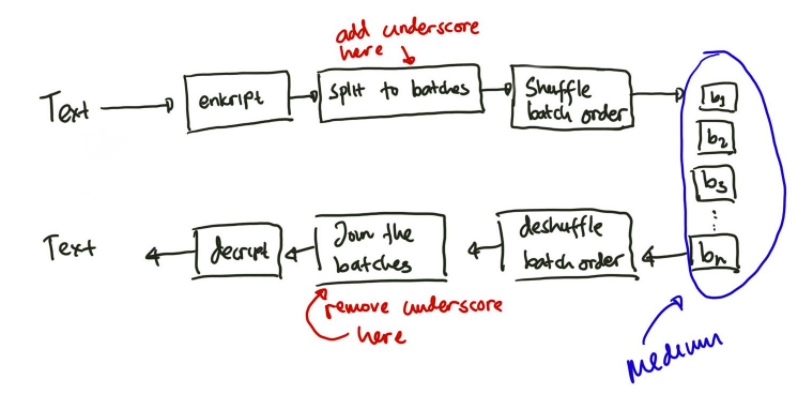

In [5]:
# Graded
 
import math
 
 
# convert txt ke dalam bentuk list teks yang lebih pendek
# dan terenkrispi dengan urutan acak setiap batchnya
def send_batch(txt,batch_order,shift=4):
  size = len(batch_order)
  batch_list = []
  for i in range(len(txt)):
      if i % size == 0:
          batch_word = txt[i:(i+size)] #membagi word menjadi seukuran batch
          while size-len(batch_word) != 0:
            batch_word += "_" # menyeragamkan semua panjang kalimat batch
          batch_list.append(caesar_encript(shuffle_order(batch_word,batch_order), shift))
  return batch_list
 
 
# batch_cpr: list keluaran send_batch
# fungsi ini akan mengembalikan lagi ke txt semula
def receive_batch(batch_cpr,batch_order,shift=3):
  batch_txt = [caesar_decript(deshuffle_order(i,batch_order),shift) for i in batch_cpr]

  return ''.join(batch_txt).strip('_')

In [7]:
# Sanity check!!!
 
msg_cpr = send_batch('Halo Heggi',[2,1,3,0],4)
msg_txt = receive_batch(msg_cpr,[2,1,3,0],4)
print(msg_txt,msg_cpr,sep='\n')

Halo Heggi
['pesL', 'iLk ', '_m_k']
